In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


In [8]:
# Load and preprocess the data
df_stocks = pd.read_csv(Path("/Users/jesusviloria/Desktop/food-inspections.csv"))

# Convert 'Risk' column to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_stocks["Risk"] = label_encoder.fit_transform(df_stocks["Risk"].fillna("Unknown"))  # Fill NaNs with 'Unknown'

# Select relevant features for prediction
features = ["License #", "Facility Type", "Zip"]  # Add other features if needed
X = df_stocks[features]
y = df_stocks["Risk"]

In [9]:
# Convert categorical features to numerical using One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=["Facility Type", "Zip"], drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_encoded_imputed = imputer.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
# Display the class labels
class_labels = label_encoder.classes_
print("Class Labels:", class_labels)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=class_labels)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Class Labels: ['All' 'Risk 1 (High)' 'Risk 2 (Medium)' 'Risk 3 (Low)' 'Unknown']
Accuracy: 0.9743426902070367
Classification Report:
                  precision    recall  f1-score   support

            All       0.33      0.20      0.25         5
  Risk 1 (High)       0.99      0.99      0.99     28313
Risk 2 (Medium)       0.96      0.96      0.96      7554
   Risk 3 (Low)       0.92      0.90      0.91      3476
        Unknown       0.40      0.35      0.38        17

       accuracy                           0.97     39365
      macro avg       0.72      0.68      0.70     39365
   weighted avg       0.97      0.97      0.97     39365



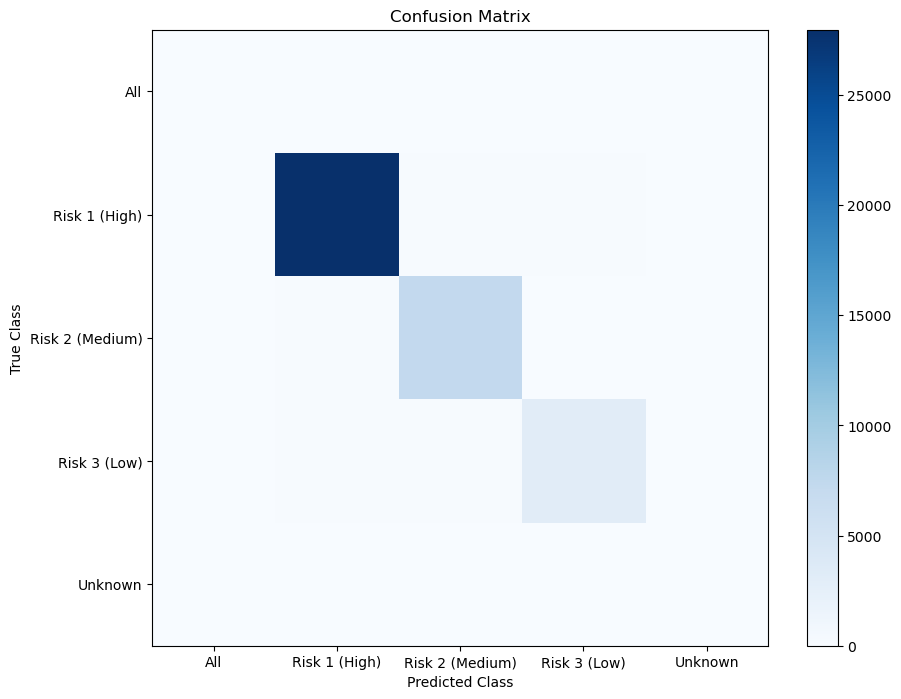

In [15]:
# Create a heatmap of the confusion matrix using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_)
plt.yticks(tick_marks, label_encoder.classes_)
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()